# CASA0007 Major Assignment

## 1. Overview

### 1.1 Research question
How are levels of unment HIV pre-exposure prophylaxis (PrEP) need associated with regional characteristics in England?

### 1.2 Data Sources
1. UK Health Security Agency PrEP Tables, from the [National PrEP monitoring and evaluation framework](https://www.gov.uk/government/publications/hiv-pre-exposure-prophylaxis-prep-monitoring-and-evaluation)  
    - HIV PrEP Need  
    - HIV prevalence  
    - HIV new diagnosis rates  
2. ONS Census [Geographical Correspondence](https://www.ons.gov.uk/methodology/geography/ukgeographies/administrativegeography/england)
3. ONS Census Demographic Data, from [Nomis](https://www.nomisweb.co.uk/sources/census_2011_ks)  
    - Country of birth
    - Ethnicity
    - Religion
    - Age structure
    - Population density
    - Living arrangements
    - Marriages/Civil partnerships
    - Socioeconomic status
    - Years lived in the UK
4. Rural/Urban Population by Local Authority, from [Department for Environment, Food and Rural Affairs](https://www.gov.uk/government/statistics/2011-rural-urban-classification-of-local-authority-and-other-higher-level-geographies-for-statistical-purposes)

**Data still need to source:**
- Sexual health service funding by county
- Social attitudes by county (e.g. indicators of openness to LGBT community)


In [1]:
#Reading in libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [13]:
# import sys
# !{sys.executable} -m pip install skimpy
from skimpy import clean_columns

## 2. Analysis

### 2.1 Load data

**Geographic Correspondence File**

In [3]:
# Read in correspondence data
correspondence = pd.read_csv('data/pcd_oa_lsoa_msoa_ltla_utla_rgn_ctry_ew_may_2021_lu_v2.csv',
                            dtype='str')

# correspondence.dtypes

In [4]:
# correspondence.head(5)

**Urban Rural Classification**

In [15]:
ruralurban = clean_columns(pd.read_csv('data/RUC11_LAD11_ENv2.csv'))

ruralurban.dtypes

9 column names have been cleaned

lad_11_cd                                                          object
lad_11_nm                                                          object
ruc_11_cd                                                         float64
ruc_11                                                             object
rural_population_1                                                 object
hub_towns_rural_related_population_1                               object
rural_including_hub_towns_rural_&_rural_related_population_1       object
total_population_1                                                 object
rural_including_hub_towns_rural_&_rural_related_population_1_1     object
dtype: object

In [16]:
# Need to combine rural-urban outputs in some way, to align with smaller list used in HIV and census data
# Same issue appears to be present in comparison of the census data vs HIV and rural-urban data

**HIV Data: PrEP Need**

In [5]:
# Read in outcome (HIV and PrEP) data
hivprepneed = pd.read_csv('data/STI by county/hiv-prep-need.csv')

# hivprepneed.dtypes
#All fields read in as expected

# Remove first row (contains England total)
hivprepneed.drop(index = 0, inplace = True)

In [6]:
# hivprepneed.head(5)

In [7]:
# Read in HIV new diagnosis data
hivnewdiagnosis = pd.read_csv('data/STI by county/new-hiv-diagnosis.csv')

# Remove first row (contains England total)
hivnewdiagnosis.drop(index = 0, inplace = True)

# hivnewdiagnosis.head(5)

In [8]:
# Read in HIV PrEP use data
hivprepuse = pd.read_csv('data/STI by county/hiv-prep-use.csv')

# Remove first row (contains England total)
hivprepuse.drop(index = 0, inplace = True)

# hivprepuse.head(5)

In [9]:
# Read in HIV prevalence data
hivprevalence = pd.read_csv('data/STI by county/hiv-prevalence.csv')

# Remove first row (contains England total)
# hivprevalence.drop(index = 0, inplace = True)

# hivprevalence.head(5)

**Census Demographic Data**

In [10]:
# Read in predictor data (Census demographics)
cob = pd.read_csv('data/Census by county/county-cob.csv')

cob = clean_columns(cob)

# cob.head(5)

14 column names have been cleaned

### 2.2 Descriptive statistics

In [11]:
# hivprepneed.describe()

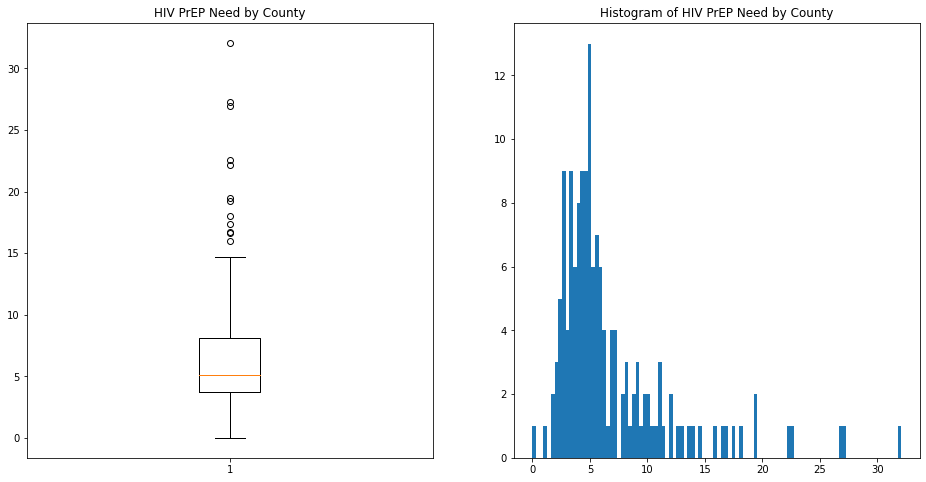

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
ax1.boxplot(hivprepneed.Value,
           vert = True)
ax1.set_title("HIV PrEP Need by County")
ax2.hist(hivprepneed.Value,
        bins = 100)
ax2.set_title("Histogram of HIV PrEP Need by County")
plt.show()

Reading the figure above, PrEP need is skewed towards the right, with a small handful of counties having much higher rates compared with the mean and median values.   
**Q:** Is this skew too extreme to meet the assumptions for a normal distribution? Should a transformation be applied or outliers removed?  
**A:** Should avoid removing outliers as in this case they are likely very important to the underlying processes (e.g. the social factors which will be examined as predictors are likely part of the reason for these extreme values, not a random or unexpected oddity).  
Could use a normalisation/standardisation method to reduce the skew? (Or will this just reduce the magnitude of variation?)